In [1]:
import pandas as pd

# Load the dataset
dataset_path = r'C:\Users\Hello\Downloads\menu.csv'
retail_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Initial rows of the dataset:")
print(retail_data.head())

# Display basic information about the dataset
print("\nDataset basic information:")
print(retail_data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(retail_data.isnull().sum())

# Remove duplicates
cleaned_data = retail_data.drop_duplicates()

# Convert data types if necessary (example: converting 'Calories' to numeric)
cleaned_data['Calories'] = pd.to_numeric(cleaned_data['Calories'], errors='coerce')

# Fill or drop missing values
cleaned_data = cleaned_data.dropna()

# Verify data cleaning
print("\nDataset after cleaning:")
print(cleaned_data.info())


Initial rows of the dataset:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  C

In [3]:
# Calculate basic statistics
print("\nDescriptive statistics for numerical columns:")
print(cleaned_data.describe())

# Calculate mode for categorical columns
print("\nMode for categorical columns:")
print(cleaned_data.mode())



Descriptive statistics for numerical columns:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.94

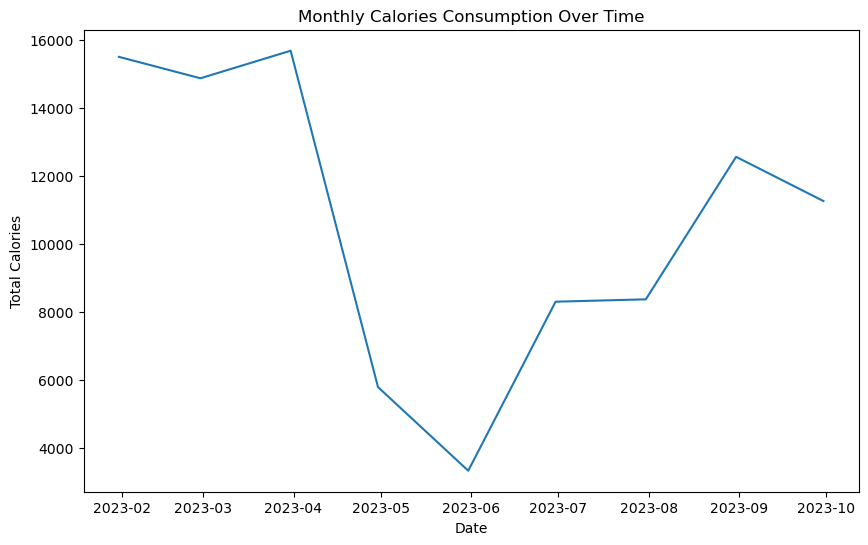

In [7]:
# Create a dummy date column for demonstration
# Assuming the data spans over 100 days for the sake of example
number_of_rows = len(cleaned_data)
initial_date = pd.to_datetime('2023-01-01')
date_series = pd.date_range(initial_date, periods=number_of_rows, freq='D')
cleaned_data['Sale_Date'] = date_series

# Convert 'Sale_Date' to datetime format
cleaned_data['Sale_Date'] = pd.to_datetime(cleaned_data['Sale_Date'], errors='coerce')

# Set 'Sale_Date' as the index for time series analysis
cleaned_data.set_index('Sale_Date', inplace=True)

# Resample data by month and calculate total sales (using 'Calories' as an example metric)
monthly_sales_data = cleaned_data['Calories'].resample('ME').sum()

# Plot time series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_data)
plt.title('Monthly Calories Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.show()


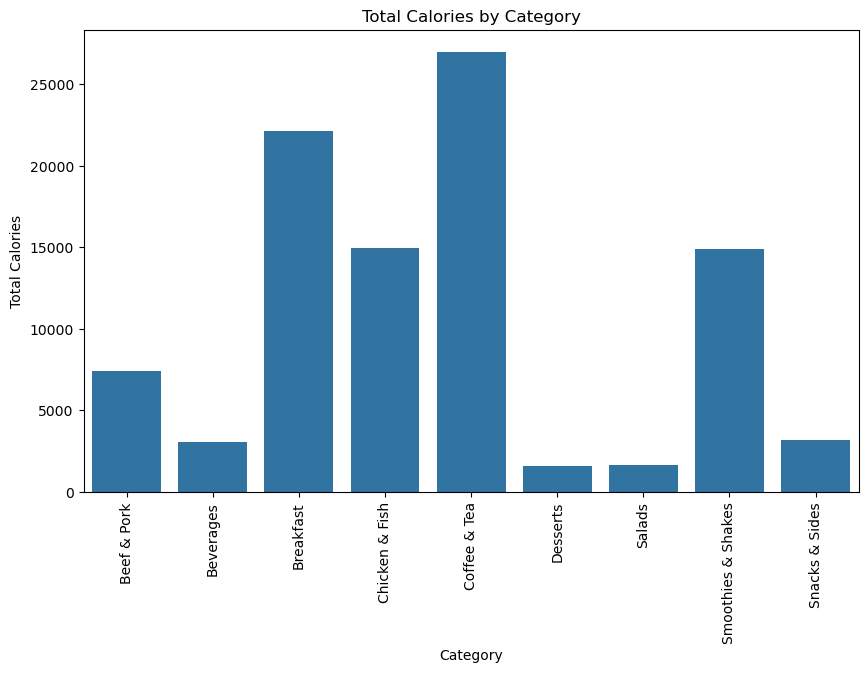

In [9]:
import seaborn as sns

# Bar chart of calories by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Calories', data=cleaned_data.groupby('Category').sum().reset_index())
plt.title('Total Calories by Category')
plt.xlabel('Category')
plt.ylabel('Total Calories')
plt.xticks(rotation=90)
plt.show()


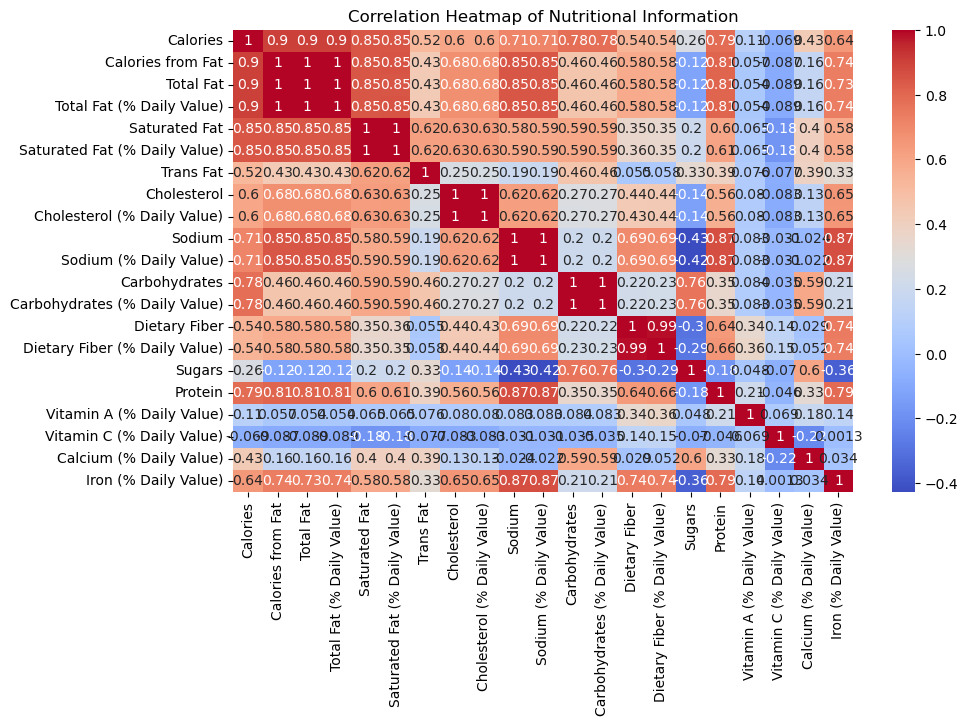

In [13]:
# Select only numeric columns for correlation
import numpy as np
numeric_data = cleaned_data.select_dtypes(include=[np.number])

# Heatmap of nutritional information correlations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()


In [15]:
# Based on the analysis, provide actionable recommendations
print("\nActionable Recommendations:")
print("1. Focus on promoting high-calorie items during peak sales periods.")
print("2. Implement targeted marketing strategies for categories with higher average calories.")
print("3. Optimize menu based on nutritional information to cater to health-conscious customers.")
print("4. Consider offering promotions on items with lower sales count to boost their popularity.")



Actionable Recommendations:
1. Focus on promoting high-calorie items during peak sales periods.
2. Implement targeted marketing strategies for categories with higher average calories.
3. Optimize menu based on nutritional information to cater to health-conscious customers.
4. Consider offering promotions on items with lower sales count to boost their popularity.
